In [1]:
# importing nacessary libraries
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading the .pkl file which containes the list of features required
df = pd.read_pickle("merged_all_table.pkl", compression='bz2')

In [3]:
# checking the shape of the data
df.shape

(25979, 54)

In [4]:
# checking for null values
df.isna().sum()

match_api_id                            0
goal                                11762
shoton                              11762
shotoff                             11762
foulcommit                          11762
card                                11762
cross                               11762
corner                              11762
possession                          11762
B365H                                3387
B365D                                3387
B365A                                3387
BWH                                  3404
BWD                                  3404
BWA                                  3404
IWH                                  3459
IWD                                  3459
IWA                                  3459
LBH                                  3423
LBD                                  3423
LBA                                  3423
PSH                                 14811
PSD                                 14811
PSA                               

# Preprocessing

In [5]:
# creating a deep copy of match 
match_df = df.copy()

In [6]:
match_df.columns

Index(['match_api_id', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
       'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'league_name', 'country_name',
       'team_api_id', 'team_long_name', 'team_short_name',
       'team_overall_score', 'home_total_goal', 'away_total_goal',
       'home_players_avg_overall_rating', 'home_players_avg_overall_score',
       'home_players_avg_ideal_body_rate', 'away_players_avg_overall_rating',
       'away_players_avg_overall_score', 'away_players_avg_ideal_body_rate',
       'target'],
      dtype='object')

In [7]:
# #droping some columns
# cols_to_drop =['match_api_id' ,'home_team_api_id' ,'away_team_api_id','PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA','home_player_X1' ,'home_player_X2' ,'home_player_X3' ,'home_player_X4' ,'home_player_X5' ,'home_player_X6' ,
#                'home_player_X7' ,'home_player_X8' ,'home_player_X9' ,'home_player_X10' ,'home_player_X11' ,'away_player_X1' ,'away_player_X2' ,
#                'away_player_X3' ,'away_player_X4' ,'away_player_X5' ,'away_player_X6' ,'away_player_X7' ,'away_player_X8' ,'away_player_X9' ,
#                'away_player_X10' ,'away_player_X11' ,'home_player_Y1' ,'home_player_Y2' ,'home_player_Y3' ,'home_player_Y4' ,'home_player_Y5' ,
#                'home_player_Y6' ,'home_player_Y7' ,'home_player_Y8' ,'home_player_Y9' ,'home_player_Y10' ,'home_player_Y11' ,'away_player_Y1' ,
#                'away_player_Y2' ,'away_player_Y3' ,'away_player_Y4' ,'away_player_Y5' ,'away_player_Y6' ,'away_player_Y7' ,'away_player_Y8' ,
#                'away_player_Y9' ,'away_player_Y10' ,'away_player_Y11' ,'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' ,
#                'possession','season', 'stage', 'date','country_name', 'league_name','season','stage','date',"goal", "shoton", "shotoff", "foulcommit", "card", "cross", "corner", "possession"]
# match_df.drop(columns=cols_to_drop, inplace = True)

# # before removing bets
# cols_to_drop =['match_api_id' ,'PSH', 'PSD', 'PSA','GBH', 'GBD', 'GBA','BSH', 'BSD', 'BSA',
#                'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
#                'country_name', 'league_name', 'team_long_name', 'team_short_name']
# match_df.drop(columns=cols_to_drop, inplace = True)

# removing bets too
cols_to_drop =['match_api_id' , 'B365H', 'B365D', 'B365A', 'BWH',
                'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
                'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
                'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA', 'team_api_id',
               'goal' ,'shoton' ,'shotoff' ,'foulcommit' ,'card' ,'cross' ,'corner' , 'possession',
               'country_name', 'league_name', 'team_long_name', 'team_short_name']
match_df.drop(columns=cols_to_drop, inplace = True)

In [8]:
# shape after dropping columns
match_df.shape

(25979, 10)

In [9]:
# creating input and output for the model
X = match_df.drop(columns=['target'])
y= match_df[['target']]

In [10]:
# input shape
X.shape

(25979, 9)

In [11]:
# checking for data types
X.dtypes

team_overall_score                  float64
home_total_goal                       int64
away_total_goal                       int64
home_players_avg_overall_rating     float64
home_players_avg_overall_score      float64
home_players_avg_ideal_body_rate    float64
away_players_avg_overall_rating     float64
away_players_avg_overall_score      float64
away_players_avg_ideal_body_rate    float64
dtype: object

## Handling Missing Values

In [12]:
# handling missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Perform missing value imputation using 'mean' strategy for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
X = numeric_imputer.fit_transform(X)
sc = StandardScaler()
X_preprocess = sc.fit_transform(X)
le = LabelEncoder()
y_le_encoded = le.fit_transform(y)

c:\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [131]:
# Define the classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    GaussianNB(),
    # SVC(),
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    LGBMClassifier()
]
# Loop through each classifier and compute the accuracy
for classifier in classifiers:
    scores = cross_val_score(classifier,X_preprocess, y_le_encoded, cv=5)
    avg_accuracy = scores.mean()
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {avg_accuracy}\n")

Classifier: LogisticRegression
Accuracy: 0.530928670236452

Classifier: DecisionTreeClassifier
Accuracy: 0.39774491520463284

Classifier: GaussianNB
Accuracy: 0.5086803575119975

Classifier: RandomForestClassifier
Accuracy: 0.4946307406081972

Classifier: XGBClassifier
Accuracy: 0.4945920345923902

Classifier: LGBMClassifier
Accuracy: 0.5071793880092853



In [132]:
# only bets features
# Classifier: LogisticRegression
# Accuracy: 0.5200735666215441

# added 'country_id' ,'league_id' ,'season' ,'stage' with bets
# Classifier: LogisticRegression
# Accuracy: 0.4584877313636536

# with bets
# Classifier: LogisticRegression
# Accuracy: 0.5321219921150571

# Classifier: DecisionTreeClassifier
# Accuracy: 0.3985523698173097

# Classifier: GaussianNB
# Accuracy: 0.3997069041781603

# Classifier: SVC
# Accuracy: 0.5260017070953372

# Classifier: RandomForestClassifier
# Accuracy: 0.49928845836102553

# Classifier: XGBClassifier
# Accuracy: 0.48962709154372847

# Classifier: LGBMClassifier
# Accuracy: 0.5067175535189948

In [18]:
def calculate_performance_metrics(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Calculate performance metrics
    accuracy = cm.diagonal().sum() / cm.sum()
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)

In [19]:
def print_cm(y_test,y_pred):
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [20]:
def feature_importance(model_name):
    # plotting the important features from the input for better understanding
    importances= model_name.feature_importances_
    forest_importances = pd.Series(importances, index=(match_df.drop(columns=['target'])).columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(forest_importances)
    ax.set_title("Feature importances")
    ax.set_ylabel("FI")
    fig.tight_layout()

### Train Test split for the Models

In [21]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocess,y_le_encoded, stratify=y_le_encoded, test_size=0.3, random_state=42)

## Checking LGBM

In [22]:
# defining the LGBM model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)

# predicting using LGBM model
y_pred_lgbm = lgbm_classifier.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 18185, number of used features: 9
[LightGBM] [Info] Start training from score -1.246951
[LightGBM] [Info] Start training from score -1.370852
[LightGBM] [Info] Start training from score -0.779294


In [23]:
# checking for the accuracy
lgbm_classifier.score(X_test,y_test)

0.5218116499871697

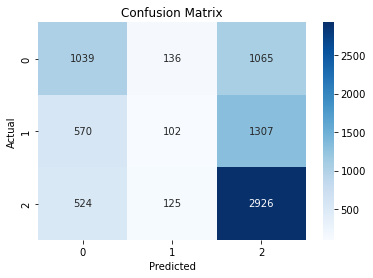

In [24]:
print_cm(y_test,y_pred_lgbm)

In [25]:
calculate_performance_metrics(y_test,y_pred_lgbm)

Accuracy: 0.5218116499871697
Precision: 0.4646674372262595
Recall: 0.5218116499871697
F1 Score: 0.46120340134209026


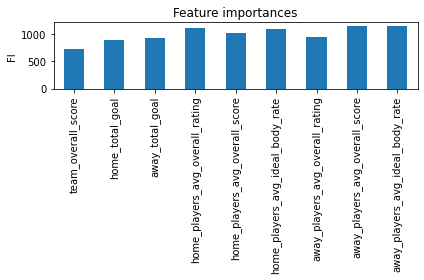

In [26]:
feature_importance(lgbm_classifier)

## Checking Random Forest

In [27]:
# checking using randomforest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# predicting using LGBM model
y_pred_rf = rf.predict(X_test)

In [28]:
# checking for the accuracy
rf.score(X_test,y_test)

0.5048755452912497

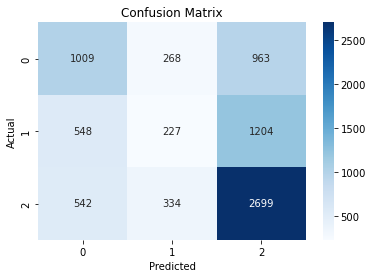

In [29]:
print_cm(y_test,y_pred_rf)

In [30]:
calculate_performance_metrics(y_test,y_pred_rf)

Accuracy: 0.5048755452912497
Precision: 0.46209960757174895
Recall: 0.5048755452912497
F1 Score: 0.46804711264230386


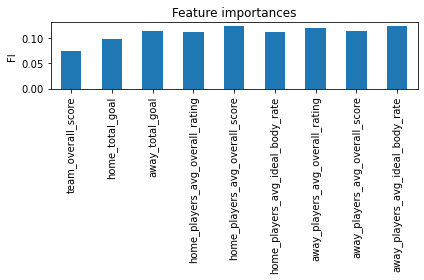

In [31]:
feature_importance(rf)

## Checking Logistic Regression

In [32]:
# checking using randomforest
lr = LogisticRegression()
lr.fit(X_train,y_train)

# predicting using LGBM model
y_pred_lr = lr.predict(X_test)

In [33]:
# checking for the accuracy
lr.score(X_test,y_test)

0.5309212214523993

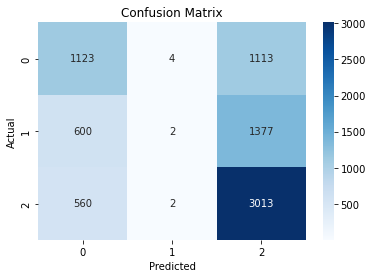

In [34]:
print_cm(y_test,y_pred_lr)

In [35]:
calculate_performance_metrics(y_test,y_pred_lr)

Accuracy: 0.5309212214523993
Precision: 0.4559893228041587
Recall: 0.5309212214523993
F1 Score: 0.4477036012562283


## Checking Decision Classifier

In [36]:
# checking using randomforest
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# predicting using LGBM model
y_pred_dt = dt.predict(X_test)

In [37]:
# checking for the accuracy
dt.score(X_test,y_test)

0.41878367975365666

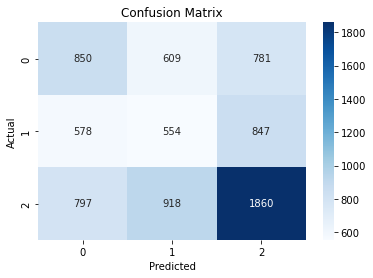

In [38]:
print_cm(y_test,y_pred_dt)

In [39]:
calculate_performance_metrics(y_test,y_pred_dt)

Accuracy: 0.41878367975365666
Precision: 0.42198735346925975
Recall: 0.41878367975365666
F1 Score: 0.42030385692456235


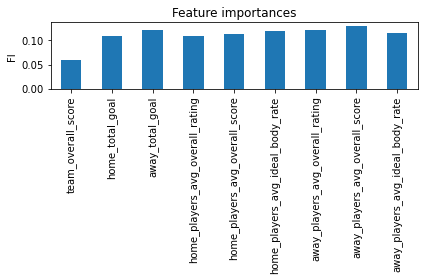

In [40]:
feature_importance(dt)

## Checking Naive Bays

In [41]:
# checking using randomforest
nb = GaussianNB()
nb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_nb = nb.predict(X_test)

In [42]:
# checking for the accuracy
nb.score(X_test,y_test)

0.5182191429304593

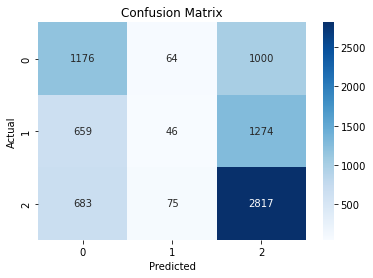

In [43]:
print_cm(y_test,y_pred_nb)

In [44]:
calculate_performance_metrics(y_test,y_pred_nb)

Accuracy: 0.5182191429304593
Precision: 0.4511665280821707
Recall: 0.5182191429304593
F1 Score: 0.45106844970599114


## Checking SVC

In [45]:
# checking using randomforest
svc = SVC()
svc.fit(X_train,y_train)

# predicting using LGBM model
y_pred_svc = svc.predict(X_test)

In [46]:
# checking for the accuracy
svc.score(X_test,y_test)

0.5283551449833205

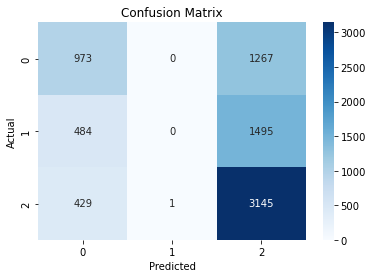

In [47]:
print_cm(y_test,y_pred_svc)

In [48]:
calculate_performance_metrics(y_test,y_pred_svc)

Accuracy: 0.5283551449833205
Precision: 0.39248517773253633
Recall: 0.5283551449833205
F1 Score: 0.4398255805368541


## Checking XGB

In [49]:
# checking using randomforest
xb = xgb.XGBClassifier()
xb.fit(X_train,y_train)

# predicting using LGBM model
y_pred_xb = xb.predict(X_test)

In [50]:
# checking for the accuracy
xb.score(X_test,y_test)

0.5153964588144727

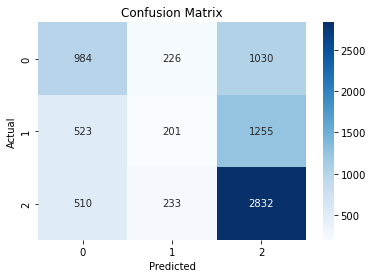

In [51]:
print_cm(y_test,y_pred_xb)

In [52]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5153964588144727
Precision: 0.4713969628736005
Recall: 0.5153964588144727
F1 Score: 0.4704386072157805


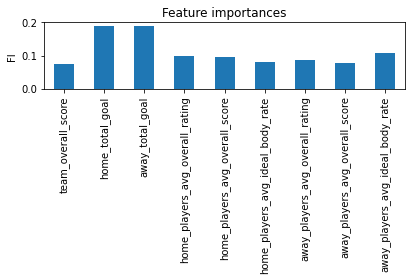

In [53]:
feature_importance(xb)

## Neural Network Model (Test)

In [56]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [57]:
# Create an instance of the OneHotEncoder
oh = OneHotEncoder()

# Fit and transform the categorical data
oh_encoded = oh.fit_transform(y_train.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded = oh_encoded.toarray()

# Fit and transform the categorical data
oh_encoded_test = oh.fit_transform(y_test.reshape(-1, 1))

# Convert the encoded data to a dense array
oh_encoded_test = oh_encoded_test.toarray()

In [58]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(518, activation='relu', input_shape=(9,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 518)               5180      
                                                                 
 dropout (Dropout)           (None, 518)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               132864    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 24)                3

In [64]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=6,min_delta=0.001,restore_best_weights=True)

In [66]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
# Train the model
model.fit(X_train, oh_encoded, epochs=50, batch_size=24,validation_data=(X_test,oh_encoded_test),
              callbacks=[early_stopping])

Epoch 1/50
  1/758 [..............................] - ETA: 5s - loss: 0.8166 - accuracy: 0.6250

758/758 [==============================] - 3s 4ms/step - loss: 0.8510 - accuracy: 0.6123 - val_loss: 1.1238 - val_accuracy: 0.5015
Epoch 2/50
758/758 [==============================] - 3s 4ms/step - loss: 0.8511 - accuracy: 0.6146 - val_loss: 1.1224 - val_accuracy: 0.5026
Epoch 3/50
758/758 [==============================] - 3s 4ms/step - loss: 0.8479 - accuracy: 0.6147 - val_loss: 1.1105 - val_accuracy: 0.4920
Epoch 4/50
758/758 [==============================] - 3s 4ms/step - loss: 0.8464 - accuracy: 0.6156 - val_loss: 1.1056 - val_accuracy: 0.4964
Epoch 5/50
758/758 [==============================] - 3s 4ms/step - loss: 0.8348 - accuracy: 0.6221 - val_loss: 1.1420 - val_accuracy: 0.4947
Epoch 6/50
758/758 [==============================] - 3s 4ms/step - loss: 0.8359 - accuracy: 0.6196 - val_loss: 1.1494 - val_accuracy: 0.4955
Epoch 7/50
758/758 [==============================] - 3s 4ms/step - loss: 0.8371 - accuracy: 0.6200 - val_loss: 1.1488 - val_accuracy: 0.4873
Epoch 8/50
758/75

In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, oh_encoded_test)

  1/244 [..............................] - ETA: 6s - loss: 0.8933 - accuracy: 0.6562

244/244 [==============================] - 0s 2ms/step - loss: 1.1056 - accuracy: 0.4964


In [71]:
# Make predictions
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1)

244/244 [==============================] - 0s 1ms/step


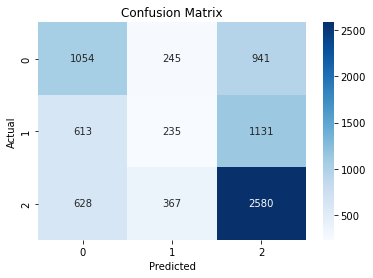

In [72]:
print_cm(y_test,predicted_labels)

In [73]:
calculate_performance_metrics(y_test,y_pred_xb)

Accuracy: 0.5153964588144727
Precision: 0.4713969628736005
Recall: 0.5153964588144727
F1 Score: 0.4704386072157805


### TabNet: 
- TabNet is a deep learning model specifically designed for tabular data. 
- It uses a modified form of the transformer architecture and employs a combination of sequential and attention-based processing to capture the relationships between different features in the tabular data

In [78]:
# ! pip install torch torchvision torchaudio
# ! pip install pytorch-tabnet

In [75]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

In [77]:
clf = TabNetClassifier()

In [83]:
# Fit the model on the training data
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_test,y_test)],
    patience=6,  # Number of epochs with no improvement after which training will be stopped
    max_epochs=100,  # Maximum number of training epochs
)

epoch 0  | loss: 1.10954 | val_0_accuracy: 0.49397 |  0:00:01s
epoch 1  | loss: 1.01139 | val_0_accuracy: 0.505   |  0:00:02s
epoch 2  | loss: 0.99893 | val_0_accuracy: 0.51732 |  0:00:03s
epoch 3  | loss: 0.99377 | val_0_accuracy: 0.51899 |  0:00:04s
epoch 4  | loss: 0.99188 | val_0_accuracy: 0.51886 |  0:00:05s
epoch 5  | loss: 0.9912  | val_0_accuracy: 0.51873 |  0:00:06s
epoch 6  | loss: 0.98737 | val_0_accuracy: 0.51475 |  0:00:08s
epoch 7  | loss: 0.98919 | val_0_accuracy: 0.52168 |  0:00:09s
epoch 8  | loss: 0.98701 | val_0_accuracy: 0.5213  |  0:00:10s
epoch 9  | loss: 0.98813 | val_0_accuracy: 0.52194 |  0:00:11s
epoch 10 | loss: 0.98695 | val_0_accuracy: 0.52079 |  0:00:12s
epoch 11 | loss: 0.98425 | val_0_accuracy: 0.52489 |  0:00:13s
epoch 12 | loss: 0.98541 | val_0_accuracy: 0.51758 |  0:00:15s
epoch 13 | loss: 0.98332 | val_0_accuracy: 0.52284 |  0:00:16s
epoch 14 | loss: 0.98252 | val_0_accuracy: 0.52143 |  0:00:17s
epoch 15 | loss: 0.98355 | val_0_accuracy: 0.52245 |  0

In [86]:
# Make predictions
predictions = clf.predict(X_test)
# predicted_labels = tf.argmax(predictions, axis=1)

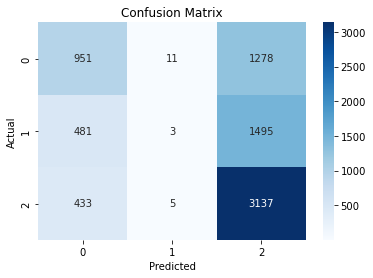

In [88]:
print_cm(y_test,predictions)

not good.